In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!ls '/content/drive/MyDrive/IE5374 Workspace/Colab Notebooks/Project_1/'

 Data1.csv   Data5.csv	'K to Clusters.gsheet'	 WorldData.ipynb
 Data2.csv   Data6.csv	 Project_1.ipynb	'World Indicators.csv'
 Data3.csv   Data7.csv	 Sandbox_data1.ipynb
 Data4.csv   Data8.csv	 Sandbox.ipynb


### Task 1 - Data 1 K Means Clustering

In [ ]:
df_1 = pd.read_csv('/content/drive/MyDrive/IE5374 Workspace/Colab Notebooks/Project_1/Data1.csv')
df_1 = df_1.drop('Unnamed: 0', axis=1)
df_1

KeyError: ignored

In [ ]:
# Convert the labels of the defined classes from 1-7 to 0-6 as model prediction is between 0-6
df_1.loc[df_1['Class']==1,'Class'] = 0
df_1.loc[df_1['Class']==2,'Class'] = 1
df_1.loc[df_1['Class']==3,'Class'] = 2
df_1.loc[df_1['Class']==4,'Class'] = 3
df_1.loc[df_1['Class']==5,'Class'] = 4
df_1.loc[df_1['Class']==6,'Class'] = 5
df_1.loc[df_1['Class']==7,'Class'] = 6

In [ ]:
df_1

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, f1_score, adjusted_rand_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler

# Using min max scaler to scale the features for better model fit
#scaler = MinMaxScaler()
#model = scaler.fit(df_1.iloc[:,0:3])
#scaled_data = model.transform(df_1.iloc[:,0:3])
#scaled_df_1 = pd.DataFrame(scaled_data)

# Kmeans clustering model
km = KMeans(n_clusters=7,random_state=10)
km.fit_predict(df_1)
print(km.labels_)
print("\n")
print("Accuracy Score :",accuracy_score(df_1['Class'],km.labels_))
print("F1 Score :", f1_score(df_1['Class'], km.labels_, average="macro"))
#print("Adjusted Random Index :",adjusted_rand_score(df_1['Class'],km.labels_))

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
mdlh=AgglomerativeClustering()
mdlh.fit(df_1)
mdlh.labels_

Z1 = AgglomerativeClustering(n_clusters=2, linkage='ward')
dend = shc.dendrogram(shc.linkage(df_1.iloc[:,0:3], method='ward'))
plt.axhline(y=10, color='r', linestyle='--')
plt.gcf().set_size_inches(12,7)

In [ ]:
from sklearn.metrics import f1_score
print(f1_score(df_1['Class'],km.labels_, average='macro'))

In [ ]:
# 3D Visual of predicted clusters
import plotly.express as px
plot = px.scatter_3d(df_1, x='X1', y='X2', z='X3', color=km.labels_)
plot.show()

In [ ]:
# 3D visuals of defined clusters
import plotly.express as px
plot = px.scatter_3d(df_1, x='X1', y='X2', z='X3', color='Class')
plot.show()

## Task 1 - Data 2 K Means Clustering

In [ ]:
df_2 = pd.read_csv('/content/drive/MyDrive/IE5374 Workspace/Colab Notebooks/Project_1/Data2.csv')
df_2 = df_2.drop('Unnamed: 0', axis=1)
df_2

,X,Y,C,Class
0,3.277701,0.814082,0.326574,1
1,0.387577,0.176780,0.888046,1
2,0.268546,0.582963,0.080981,1
3,2.031145,0.244597,0.643921,1
4,0.188677,0.461280,0.496633,1
...,...,...,...,...
399,3.248655,2.297291,3.388138,3
400,4.100000,5.100000,0.504558,4
401,3.900000,4.900000,0.941634,4
402,4.000000,5.000000,0.702123,4


In [ ]:
# Convert the labels of the defined classes from 1-7 to 0-6 as model prediction is between 0-6
df_2.loc[df_2['Class']==1,'Class'] = 0
df_2.loc[df_2['Class']==2,'Class'] = 1
df_2.loc[df_2['Class']==3,'Class'] = 2
df_2.loc[df_2['Class']==4,'Class'] = 3
df_2


,X,Y,C,Class
0,3.277701,0.814082,0.326574,0
1,0.387577,0.176780,0.888046,0
2,0.268546,0.582963,0.080981,0
3,2.031145,0.244597,0.643921,0
4,0.188677,0.461280,0.496633,0
...,...,...,...,...
399,3.248655,2.297291,3.388138,2
400,4.100000,5.100000,0.504558,3
401,3.900000,4.900000,0.941634,3
402,4.000000,5.000000,0.702123,3


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, accuracy_score, f1_score
from sklearn.preprocessing import MinMaxScaler
# Using min max scaler to scale the features for better model fit
#scaler = MinMaxScaler()
#model = scaler.fit(df_2.iloc[:,1:4])
#scaled_data = model.transform(df_2.iloc[:,1:4])
#scaled_df_2 = pd.DataFrame(scaled_data, columns=["X1","X2","X3"])

# Kmeans clustering model

km = KMeans(n_clusters=4,random_state=10)
km.fit_predict(df_2)
print(km.labels_)

print("\n")
print("Accuracy Score :",accuracy_score(df_2['Class'],km.labels_))
print("F1 Score :", f1_score(df_2['Class'], km.labels_, average="macro"))
#print("Adjusted Random Index :",adjusted_rand_score(df_2['Class'],km.labels_))

[1 0 0 1 0 1 1 1 1 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 0 1 1 1 0
 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1
 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 0 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 1 0 0 1 1 0
 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 1 1 0 0 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0
 1 0 0 0 0 1 1 0 0 0 1 0 0 1 0 3 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3 0 3 3 0 3
 3 3 3 3 3 3 0 3 3 0 3 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3 3 0
 3 0 0 3 3 3 0 0 0 3 0 3 3 3 3 3 3 3 0 3 3 3 0 0 3 3 3 0 3 3 3 3 3 3 0 3 3
 3 0 0 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


Accuracy Score : 0.5371287128712872
F1 Score : 0.4181749622926093


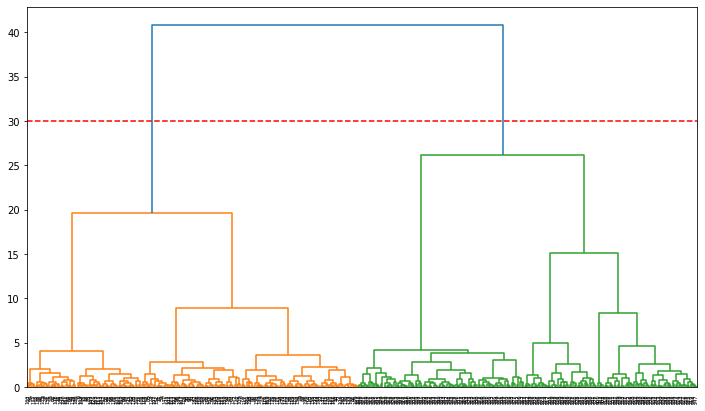

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
mdl2=AgglomerativeClustering()
mdl2.fit(df_2)
mdl2.labels_

Z2 = AgglomerativeClustering(n_clusters=2, linkage='ward')
dend = shc.dendrogram(shc.linkage(df_2.iloc[:,0:3], method='ward'))
plt.axhline(y=30, color='r', linestyle='--')
plt.gcf().set_size_inches(12,7)

In [ ]:
# 3D visuals of predicted clusters
import plotly.express as px
plot = px.scatter_3d(df_2, x="X", y='Y', z='C', color=km.labels_)
plot.show()

In [ ]:
# 3D visuals of defined clusters
import plotly.express as px
plot = px.scatter_3d(df_2, x='X', y='Y', z='C', color='Class')
plot.show()

## Task 1 - Data 3 K Means Clustering

In [ ]:
df_3 = pd.read_csv('/content/drive/MyDrive/IE5374 Workspace/Colab Notebooks/Project_1/Data3.csv')
df_3 = df_3.drop('Unnamed: 0', axis=1)
df_3

,X1,X2,X3,Class
0,1.295428,0.050829,-0.385217,1
1,1.409178,-0.035191,-0.251980,1
2,1.096803,0.246365,-0.415011,1
3,1.463328,0.265354,-0.513488,1
4,1.603284,0.080577,-0.470257,1
...,...,...,...,...
395,0.795695,0.209456,1.880609,4
396,0.653127,-0.703156,1.549448,4
397,-0.726249,-0.103244,0.694300,4
398,0.808596,-0.492640,1.649370,4


In [ ]:
# Convert the labels of the defined classes from 1-7 to 0-6 as model prediction is between 0-6
df_3.loc[df_3['Class']==1,'Class'] = 0
df_3.loc[df_3['Class']==2,'Class'] = 1
df_3.loc[df_3['Class']==3,'Class'] = 2
df_3.loc[df_3['Class']==4,'Class'] = 3
df_3

,X1,X2,X3,Class
0,1.295428,0.050829,-0.385217,0
1,1.409178,-0.035191,-0.251980,0
2,1.096803,0.246365,-0.415011,0
3,1.463328,0.265354,-0.513488,0
4,1.603284,0.080577,-0.470257,0
...,...,...,...,...
395,0.795695,0.209456,1.880609,3
396,0.653127,-0.703156,1.549448,3
397,-0.726249,-0.103244,0.694300,3
398,0.808596,-0.492640,1.649370,3


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, accuracy_score, f1_score

# Kmeans clustering model

km = KMeans(n_clusters=4,random_state=10)
km.fit_predict(df_3)
print(km.labels_)

print("\n")
print("Accuracy Score :",accuracy_score(df_3['Class'],km.labels_))
print("F1 Score :", f1_score(df_3['Class'], km.labels_, average="macro"))
#print("Adjusted Random Index :",adjusted_rand_score(df_3['Class'],km.labels_))

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


Accuracy Score : 0.5
F1 Score : 0.5


Hierarchical Clustering

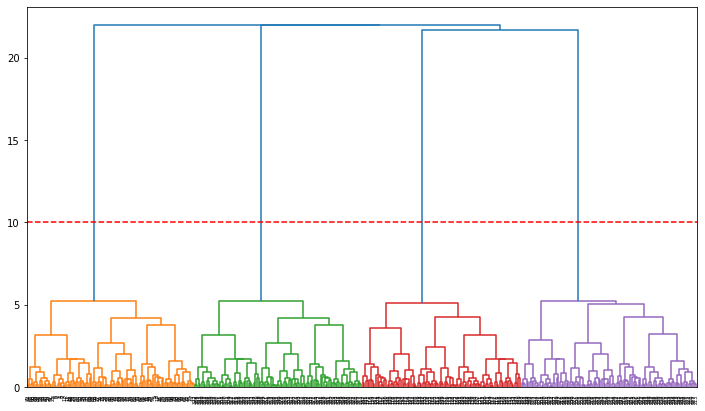

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
mdlh=AgglomerativeClustering()
mdlh.fit(df_3)
mdlh.labels_


dend = shc.dendrogram(shc.linkage(df_3.iloc[:,0:3], method='ward'))
plt.axhline(y=10, color='r', linestyle='--')
plt.gcf().set_size_inches(12,7)

In [ ]:
# 3D visuals of defined clusters
import plotly.express as px
plot = px.scatter_3d(df_3, x='X1', y='X2', z='X3', color='Class')
plot.show()

In [ ]:
# 3D visuals of predicted clusters
import plotly.express as px
plot = px.scatter_3d(df_3, x='X1', y='X2', z='X3', color=km.labels_)
plot.show()

## Task 1 - Dataset 4 K Means Clustering

In [ ]:
df_4 = pd.read_csv('/content/drive/MyDrive/IE5374 Workspace/Colab Notebooks/Project_1/Data4.csv')
df_4 = df_4.drop('Unnamed: 0', axis=1)

In [ ]:
# Convert the labels of the defined classes from 1-7 to 0-6 as model prediction is between 0-6
df_4.loc[df_4['Class']==1,'Class'] = 0
df_4.loc[df_4['Class']==2,'Class'] = 1

df_4

,X1,X2,X3,Class
0,-0.45300,-0.8910,0.02300,0
1,0.65300,-0.8460,0.02110,0
2,0.39800,0.9130,-0.00139,0
3,0.09520,1.0500,0.00628,0
4,0.52400,-0.9410,0.03780,0
...,...,...,...,...
995,0.01520,0.0531,-0.36100,1
996,0.05160,0.6910,0.87500,1
997,-0.00511,1.3900,-0.94700,1
998,-0.06710,0.7140,0.88100,1


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, accuracy_score, f1_score
from sklearn.preprocessing import MinMaxScaler

# Kmeans clustering model

km = KMeans(n_clusters=2,random_state=200)
km.fit_predict(df_4)
print(km.labels_)

print("\n")
print("Accuracy Score :",accuracy_score(df_4['Class'],km.labels_))
print("F1 Score :", f1_score(df_4['Class'], km.labels_, average="macro"))
#print("Adjusted Random Index :",adjusted_rand_score(df_4['Class'],km.labels_))

[1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 0 1 0 0 1 1 1 0 1 1 0 1 0 1 1 0 0 1 1 0 0 0
 1 0 1 0 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 0 0 1 0 0 1 1
 0 0 0 0 1 0 0 0 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 0 1 0
 1 1 1 0 0 1 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 0
 1 1 0 1 0 1 0 0 1 0 1 1 0 1 0 1 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0
 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 1 0 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1
 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 1 0 0 0 0 1 0 1 1
 0 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 1 1 0 1 1
 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1 0 0 0 0 1 1 0 0 1
 0 0 1 1 0 0 1 0 1 1 1 1 1 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 0 1 0 0 0 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 0 0 0 1 1 0
 1 1 1 1 0 0 1 0 1 1 1 1 1 0 0 1 1 0 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0
 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 1 1
 0 0 0 1 1 0 1 1 0 1 1 1 

Hierarchical Clustering

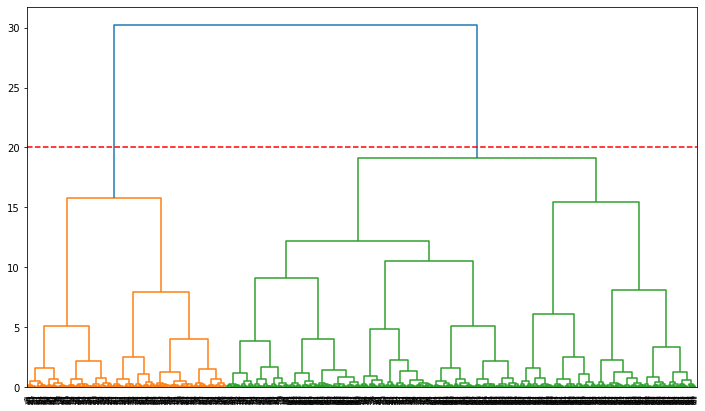

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
mdlh=AgglomerativeClustering()
mdlh.fit(df_4)
mdlh.labels_


dend = shc.dendrogram(shc.linkage(df_4.iloc[:,0:3], method='ward'))
plt.axhline(y=20, color='r', linestyle='--')
plt.gcf().set_size_inches(12,7)

In [ ]:
 # 3D visuals of predicted clusters
import plotly.express as px
plot = px.scatter_3d(df_4, x='X1', y='X2', z='X3', color=km.labels_)
plot.show()

In [ ]:
# 3D visuals of Original Data
import plotly.express as px
plot = px.scatter_3d(df_4, x='X1', y='X2', z='X3', color='Class')
plot.show()

## Task 1 - Data 5 K Means clustering

In [ ]:
df_5 = pd.read_csv('/content/drive/MyDrive/IE5374 Workspace/Colab Notebooks/Project_1/Data5.csv')
df_5

In [ ]:
# Convert the labels of the defined classes from 1-7 to 0-6 as model prediction is between 0-6
df_5.loc[df_5['Class']==1,'Class'] = 0
df_5.loc[df_5['Class']==2,'Class'] = 1

df_5

In [ ]:
# Elbow Method
from sklearn.cluster import KMeans
import seaborn as sns
result = []
for i in range(1,10):
  elbowdata = KMeans(n_clusters=i)

  elbowdata.fit(df_5.iloc[:,1:4])
  result.append(elbowdata.inertia_)

sns.lineplot(y = result, x= range(1,10))

In [ ]:
# Highest value if SHS is at k = 4

from sklearn.cluster import KMeans
from sklearn import metrics
import seaborn as sns

result = []
for i in range(2,10):
  kmeans = KMeans(n_clusters=i)

  kmeans.fit(df_5.iloc[:,1:4])
  
  print('Cluster : {}'.format(i))
  
  print('SHScore: {}'.format(str(metrics.silhouette_score(df_5.iloc[:,1:4], kmeans.labels_))))
  



In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import precision_score
km = KMeans(n_clusters=2)
km.fit_predict(df_5.iloc[:,1:4])

print("Adjusted Random Index Score :")
print(adjusted_rand_score(df_5['Class'],km.labels_))
#print("Precision_score :")
#print(precision_score(df_5['Class'], km.labels_))

In [ ]:
# 3D visuals of predicted clusters
import plotly.express as px
plot = px.scatter_3d(df_5, x='X1', y='X2', z='X3', color='Class')
plot.show()

In [ ]:
# 3D visuals of predicted clusters
import plotly.express as px
plot = px.scatter_3d(df_5, x='X1', y='X2', z='X3', color=km.labels_)
plot.show()

## Task 1 - Data 6 K Means Clustering

In [ ]:
df_6 = pd.read_csv('/content/drive/MyDrive/IE5374 Workspace/Colab Notebooks/Project_1/Data6.csv')
df_6

# Convert the labels of the defined classes from 1-7 to 0-6 as model prediction is between 0-6
df_6.loc[df_6['Class']==1,'Class'] = 0
df_6.loc[df_6['Class']==2,'Class'] = 1

df_6

In [ ]:
# Elbow Method
from sklearn.cluster import KMeans
import seaborn as sns
result = []
for i in range(1,10):
  elbowdata = KMeans(n_clusters=i)

  elbowdata.fit(df_6.iloc[:,1:3])
  result.append(elbowdata.inertia_)

sns.lineplot(y = result, x= range(1,10))

In [ ]:
# Highest value if SHS is at k = 4

from sklearn.cluster import KMeans
from sklearn import metrics
import seaborn as sns

result = []
for i in range(2,10):
  kmeans = KMeans(n_clusters=i)

  kmeans.fit(df_6.iloc[:,1:3])
  
  print('Cluster : {}'.format(i))
  
  print('SHScore: {}'.format(str(metrics.silhouette_score(df_6.iloc[:,1:3], kmeans.labels_))))
  



In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import precision_score
km = KMeans(n_clusters=2)
km.fit_predict(df_6.iloc[:,1:3])

#print("Adjusted Random Index Score :")
#print(adjusted_rand_score(df_5['Class'],km.labels_))
print("Precision_score :")
print(precision_score(df_6['Class'], km.labels_))

In [ ]:
# 3D visuals of predicted clusters
import plotly.express as px
plot = px.scatter(df_6, x='X1', y='X2', color='Class')
plot.show()

In [ ]:
# 3D visuals of predicted clusters
import plotly.express as px
plot = px.scatter(df_6, x='X1', y='X2', color=km.labels_)
plot.show()

## Task 1 - Data 7 K Means Clustering

In [ ]:
df_7 = pd.read_csv('/content/drive/MyDrive/IE5374 Workspace/Colab Notebooks/Project_1/Data7.csv')
df_7

In [ ]:
# Convert the labels of the defined classes from 1-7 to 0-6 as model prediction is between 0-6
df_7.loc[df_7['Class']==1,'Class'] = 0
df_7.loc[df_7['Class']==2,'Class'] = 1
df_7.loc[df_7['Class']==3,'Class'] = 2
df_7.loc[df_7['Class']==4,'Class'] = 3
df_7.loc[df_7['Class']==5,'Class'] = 4
df_7.loc[df_7['Class']==6,'Class'] = 5

df_7

In [ ]:
# Elbow Method
from sklearn.cluster import KMeans
import seaborn as sns
result = []
for i in range(1,10):
  elbowdata = KMeans(n_clusters=i)

  elbowdata.fit(df_7.iloc[:,1:3])
  result.append(elbowdata.inertia_)

sns.lineplot(y = result, x= range(1,10))

In [ ]:
# Highest value if SHS is at k = 4

from sklearn.cluster import KMeans
from sklearn import metrics
import seaborn as sns

result = []
for i in range(2,10):
  kmeans = KMeans(n_clusters=i)

  kmeans.fit(df_7.iloc[:,1:3])
  
  print('Cluster : {}'.format(i))
  
  print('SHScore: {}'.format(str(metrics.silhouette_score(df_7.iloc[:,1:3], kmeans.labels_))))
  



In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import precision_score
km = KMeans(n_clusters=5)
km.fit_predict(df_7.iloc[:,1:3])

print("Adjusted Random Index Score :")
print(adjusted_rand_score(df_7['Class'],km.labels_))
#print("Precision_score :")
#print(precision_score(df_6['Class'], km.labels_))

In [ ]:
# 3D visuals of predicted clusters
import plotly.express as px
plot = px.scatter(df_7, x='X1', y='X2', color=km.labels_)
plot.show()

In [ ]:
# 3D visuals of predicted clusters
import plotly.express as px
plot = px.scatter(df_7, x='X1', y='X2', color='Class')
plot.show()

## Task 1 - Data 8 K Means clustering

In [ ]:
df_8 = pd.read_csv('/content/drive/MyDrive/IE5374 Workspace/Colab Notebooks/Project_1/Data8.csv')
df_8

In [ ]:
df_8.loc[df_8['Class']==1,'Class'] = 0
df_8

In [ ]:
# Elbow Method
from sklearn.cluster import KMeans
import seaborn as sns
result = []
for i in range(1,10):
  elbowdata = KMeans(n_clusters=i)

  elbowdata.fit(df_8.iloc[:,1:4])
  result.append(elbowdata.inertia_)

sns.lineplot(y = result, x= range(1,10))

In [ ]:
# Highest value if SHS is at k = 4

from sklearn.cluster import KMeans
from sklearn import metrics
import seaborn as sns

result = []
for i in range(2,10):
  kmeans = KMeans(n_clusters=i)

  kmeans.fit(df_8.iloc[:,1:4])
  
  print('Cluster : {}'.format(i))
  
  print('SHScore: {}'.format(str(metrics.silhouette_score(df_8.iloc[:,1:4], kmeans.labels_))))
  



In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import precision_score
km = KMeans(n_clusters=1)
km.fit_predict(df_8.iloc[:,1:4])

print("Adjusted Random Index Score :")
print(adjusted_rand_score(df_8['Class'],km.labels_))

In [ ]:
# 3D visuals of predicted clusters
import plotly.express as px
plot = px.scatter_3d(df_8, x='X1', y='X2', z='X3', color='Class')
plot.show()

In [ ]:
# 3D visuals of predicted clusters
import plotly.express as px
plot = px.scatter_3d(df_8, x='X1', y='X2', z='X3', color=km.labels_)
plot.show()